# <font color='maroon'>Visualizing Data using Python</font>

In this notebook, we learn how use the Numpy, Matplotlib, Pandas and Seaborn libraries to visualize data and functions. We can perform all plotting functions on data structures like arrays provided by Numpy and data structures likes generic lists. Matplotlib is used with the Numpy library. Pandas allows us to plot directly using dataframes. We also introduce the Seaborn library which is useful for statistical visualization and builds on Matplotlib.

<p></p>
We also learn how to get help on the libraries and functions necessary to create visualizations, or to use the libraries in general. Begin with the <b> Getting Help</b> section then continue to the visualization section beginning from the <b> Getting Started</b> section.

 

## Getting Help

You can find out more about a module or function or data type with the following ways.

In [83]:
import pandas as pd


In [84]:
help(pandas) #use pandas or the alias name given for the libary e.g. pd if import pandas as pd

NameError: name 'pandas' is not defined

In [85]:
pandas?

Object `pandas` not found.


In [86]:
dir(pandas)

NameError: name 'pandas' is not defined

`dir` returns a list of attributes and methods associated with the object.

## <font color='black'>Getting Started</font>

To get started, we first import the libraries we need into our namespace. 
We import `matplotlib`, more specifically, we're going to import `pyplot` which lets us easily use `numpy` and `matplotlib` together.

<p></p>
As you may have seen when working with the previous notebook, we can import the attributes of the library we will be using as shown below.

In [ ]:
from matplotlib import pyplot

Alternatively, we can import the library while renaming it with the standard alias `plt`.

In [87]:
#import matplotlib.pyplot as plt # uncomment to run

When plotting a graph with `matplotlib`, you decide how you want to view the plot. You can use:
0. `pyplot.show()`: see the plot immediately
0. `pyplot.savefig()`: save the plot to a file

You can also plot the graph _directly in the notebook_.

In [88]:
%matplotlib inline

The `pandas` library also provides plotting functionality, which we can use directly on the dataframes we learned about earlier.

We import the pandas library and rename it to `pd`,  because `pd` is shorter to type than `pandas`. Similarly, we import `seaborn` library.

In [89]:
import pandas as pd
import seaborn as sns

## Plotting Data

### Line graphs

A line graph is a great way to visualize trends and variations in data over a period of time. Suppose you have the following data on Bitcoin. You'd like to see how the price of Bitcoin varies over time. Let's start by loading the data and understanding its contents.

In [90]:
bitcoin = pd.read_csv('coindesk-bpi-USD-close_data-2017-11-22_2017-11-23.csv', sep=',') #load the data

In [91]:
bitcoin.tail() #observe the data to understand variables present, in this case, the bottom end of the dataset

,Date,Close Price
2206,2017-11-23 12:47:00,8169.01
2207,2017-11-23 12:48:00,8172.60
2208,2017-11-23 12:49:00,8174.09
2209,This data was produced from the CoinDesk price...,NaN
2210,http://www.coindesk.com/price/,NaN


From the previous command, note how there are 3 columns: an index, Date and Close Price of the bitcoin at the date and time indicated, except for the last 2 rows. Let's continue observing the data. You can add cells to observe the data beyond the steps we've given you e.g. What type of data is in each column? What is the frequency of data collection? How many rows and columns does the dataset have? Run the command in the cell below to find out.

In [92]:
#enter a command to find out shape of the dataset.
bitcoin.shape

(2211, 2)

Now that we understand how the data is organised, we'll explore what it tells us about bitcoins using different visualization tools. we will see how the price of bitcoin varied over the time period indicated in the file using a line graph. 
<p></p>
To plot a line graph, we need at least two variables for the x and y axes. In this case, we need the time and bitcoin closing price. If you checked the data types for the dataset, you should have seen that the <i>Date</i> column is of the type <b>str</b>. It is cumbersome to plot strings so first, we need to change the <i> Date</i> from str to something more user-friendly. For this example, we will use time. 



In [93]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%Y-%m-%d %H:%M',errors ='coerce') 
# line above converts Date from string to timestamp format

Recall when you used bitcoin.tail(), there were two rows at the end were just information about the data but not actual bitcoin prices. Converting from string to Timestamp as done above did not remove these values. Thereofore, before proceeding to plot anything, we need to remove these values.

In [94]:
bitcoin.tail() #conversion to timestamp did not remove the values but still changed them because of the errors part of the code

,Date,Close Price
2206,2017-11-23 12:47:00,8169.01
2207,2017-11-23 12:48:00,8172.60
2208,2017-11-23 12:49:00,8174.09
2209,NaT,NaN
2210,NaT,NaN


In [95]:
bitcoin_clean = bitcoin.dropna(axis =0 , how ='any') #removes rows that are not a number.

Now that we have: 1) converted Date from strings to timestamp and 2) removed non-numeric data irrelevant for bitcoin price, we can proceed to plot our line graph and see how bitcoin prices changed between November 22 and November 23, 2017.

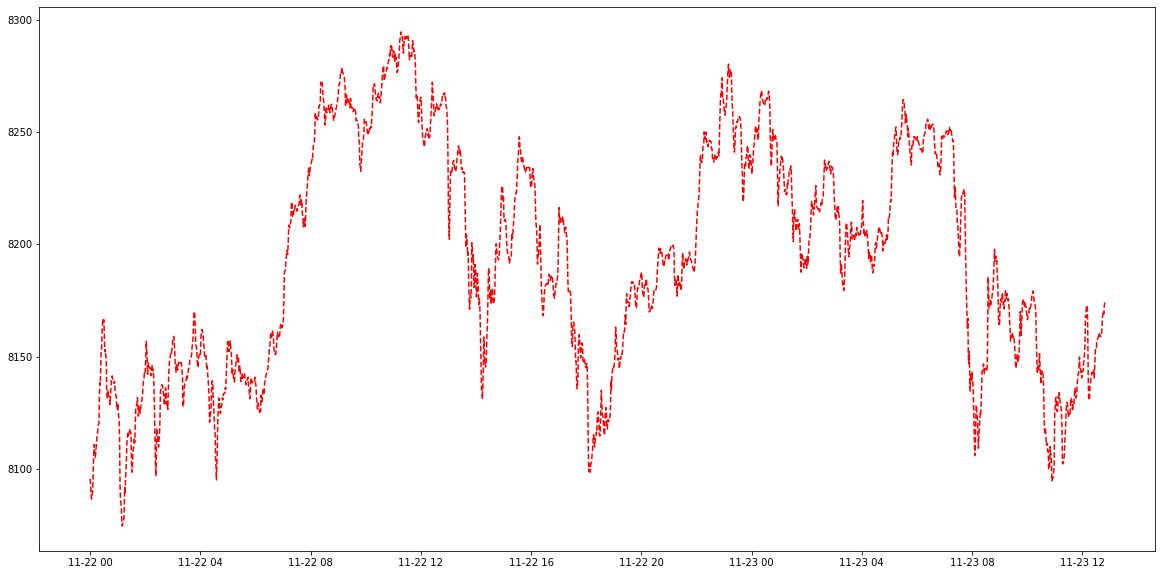

In [96]:
time_= bitcoin_clean['Date'].tolist()               #store the timestamp in a separate list to be used later
pyplot.figure(figsize=(20,10))               # set size of plot figure
pyplot.plot(time_,                           # plto the time (x-axis) against
            bitcoin_clean['Close Price'],   # bitcoin closing price (y-axis)
            'r--')                          # plot a dashed red line 

Over the time period indicated, the price of Bitcoin has fluctuated around a little bit over 200USD.

### Bar graphs

We can plot the same numerical data with a bar graph.



<BarContainer object of 2209 artists>

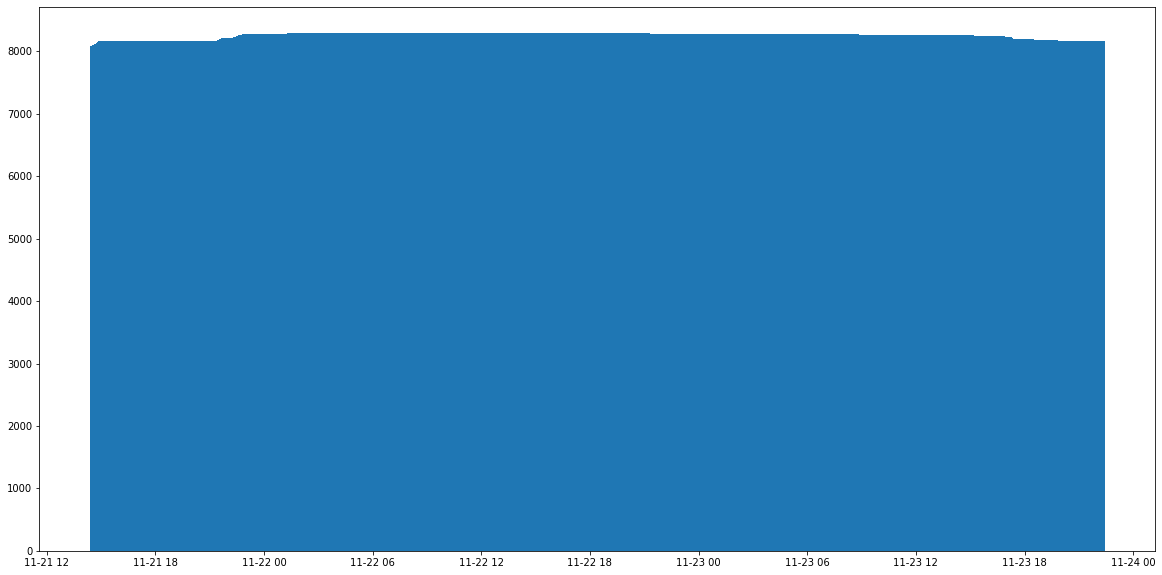

In [97]:
pyplot.figure(figsize=(20,10))               # set size of plot figure
pyplot.bar(time_,                            # x-axis
           bitcoin_clean['Close Price'])     # y-axis
                       

This bar graph is a bit cluttered because a bar is given for each day of the month for which the price of bitcoin was collected. Avoid using a bar graph if you have many data points to plot. Bar graphs can also be used to plot categorical data using bar graphs. 

### Histograms

We can use histograms to see how the data is distributed across intervals. In this example, we group the price of Bitcoin into intervals on the horizontal axis while the vertical axis shows how many minutes recorded prices in that interval. We see peaks in the intervals around 8150USD and 8250USD.

Text(0.5, 0, 'Close price')

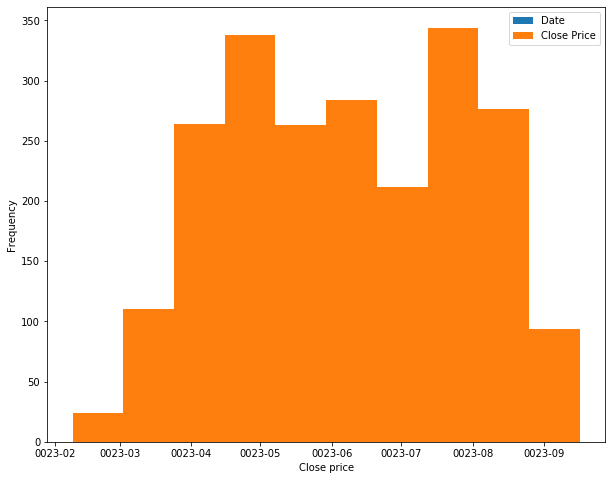

In [98]:
bitcoin.plot(kind='hist',      # choose a plot type for pandas dataframe object
             figsize=(10,8))   # set the figure size directly with pandas plot
pyplot.xlabel('Close price')   # label the horizontal axis

### Scatter plots

Scatter plots are used to study relationships between data points in a dataset. We use them to look for correlations between data points. We plot the data points in pairs, with the independent data point usually on the x-axis and the dependent data point on the y-axis.  

The scatter plot below fails to show any correlation between the bitcoin price and time. 

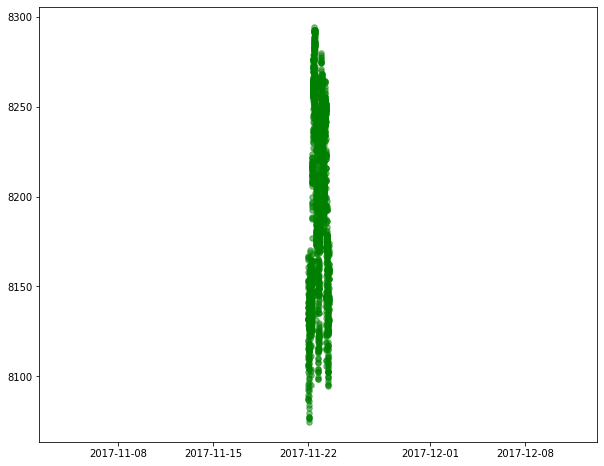

In [99]:
pyplot.figure(figsize=(10,8))
pyplot.scatter(time_,
               bitcoin_clean['Close Price'],
               s=30, 
               c='green', 
               marker='o', 
               alpha=.5)

The two lists in the first arguments of the scatter function are the x and y values. And the additional arguments are:

    `s=5`: sets the size of the dots to 5 pixels
    `green`:  will colour the dots green. Choose other options like 'r'
    `marker='o'`: will draw a circle for each data point plotted
    `alpha=0.2`: will change the transparency of the line (0<=alpha<=1).
    
<p></p>
To learn more about the scatter function, you can uncomment and run the cell below.

    

In [100]:
pyplot.scatter?

In [101]:
help(pyplot.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

Matplotlib can be used to generate more visualization tools e.g. tables. To explore this further, you can refer to matplotlib documentation and try to create a table representing the bitcoin closing prices as a percentage of all recorded prices. e.g. 8150 occurred X% of the time between Nov 22 and Nov 23. Consult with your peers, online resources and finally your moderators if necessary.

## Plotting functions

Now, let's experiment with Matplotlib and Numpy. Besides plotting existing data, you can also plot functions using Matplotlib. Earlier on, we also went through how Numpy is useful for mathematical operations on matrices and arrays. In the following steps, we will see how Matplotlib and Numpy can be used together in visualizing functions. How about plotting simple functions like $$y_1 = 2x + 3,$$ and another set of points $$y_2 = -3x - 5?$$

 


Let's generate $x$ data points that lie between $-10$ and $10$. We will use the numpy `arange()` function to generate these points.

In [102]:
import numpy as np #first import the relevant library

In [105]:
x = np.arange(-10, 10)

Next, let's generate our $y$ data. Again we use `numpy` (which we renamed `np`). For equation $$y_1 = 2x + 3,$$ we use the variable `y1` in our code for the $y$ values. 

Using list comprehension, we calculate the question $y_1 = 2x + 3$ and store the information in the variable `y1`.

In [106]:
y1 = [(i*2 + 3) for i in x]

We now use the `matplotlib` module by calling the function `plot` to plot our data points.

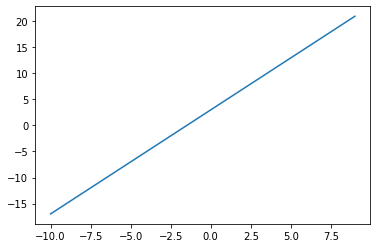

In [107]:
pyplot.plot(x, y1)

The `plot` function takes many arguments. The main arguments are the $x$ and $y$ data points. 

For equation $$y_2 = -3x - 5,$$ we use the variable `y2` in our code for the $y$ values. We can plot this equation on the same plot as the first equation. 

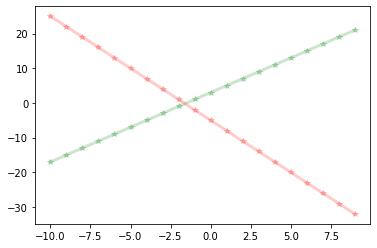

In [108]:
y2 = [((-3*i) - 5) for i in x]
pyplot.plot(x, y1, 'g', x, y2, 'r', marker='*', linewidth=3, alpha=.2)

#### Note the additional input arguments

    `g`:  will colour the line green. You can choose other options like 'r'for red
    `marker='*'`: will draw an asterisk for each data point plotted
    `alpha=0.2`: will change the transparency of the line (0<=alpha<=1).
    `linewidth=3: sets the width of the line to 3 pixels
    
   
For a complete listing of the styles of lines, see the [`plot() documentation`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

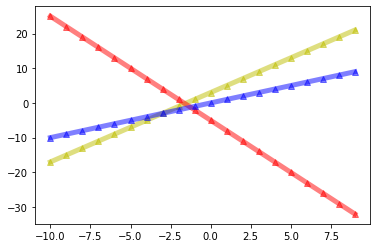

In [112]:
#write your own code changing the input arguments and compare to the plot above
y3 = x
pyplot.plot(x, y1, 'y', x, y2, 'r', x, y3, 'b',marker='^', linewidth=5, alpha=.5)

<b>Do it yourself exercise</b>: Add a third line to the same plot. This time use a new equation $y = x$. There should be 3 lines on the graph.

## Modifying your plots

You can modify the plot to suit your requirements. You can create a subplot and add axes for different plots to the subplot. You can also change the length of the axes, add labels to the axes, add legends to the plot. Let's illustrate these with a simple example.

In [113]:
x = np.arange(-10, 10) #create x data similar to Plotting Functions example
y = [((-3*i) - 5) for i in x]

### Change length of axes

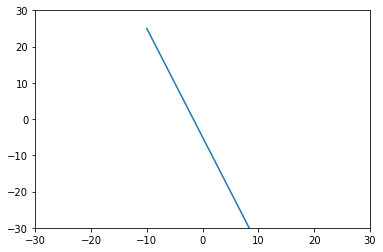

In [111]:
fig = pyplot.figure()            # create a figure object
ax = pyplot.subplot(111)         # create 1 grid with 1 subplot
pyplot.xlim(-30,30)              # change size of horizontal axis
pyplot.ylim(-30,30)              # change size of vertical axis
ax.plot(x, y)                    # add plot to subplot

### Add labels to your plot

We want to plot and label the data points given above. We'll create a subplot and add a title to our subplot. The subplot will also contain a legend. The legend command forces the legend to appear.

In [ ]:
fig = pyplot.figure()            # create a figure object
ax = pyplot.subplot(111)         # create 1 grid with 1 subplot
ax.plot(x, y, label="$y=-3x-5$")  # label the subplot. $ indicates that the label should appear as an equation
pyplot.title('A line graph')     # add title to figure
ax.legend(loc='upper right')      # set location loc of legend to upper left corner 

### Multiple plots in the same figure

We can even put more than one plot in a figure by using `subplot()`. For example, we could divide a figure vertically into two subplots, by creating a 1 by 2 grid and positioning the figures in the columns. The first subplot has its own axis, so does the second subplot.

Now, let's create a suplot for the two functions we defined above: y1 and y2.

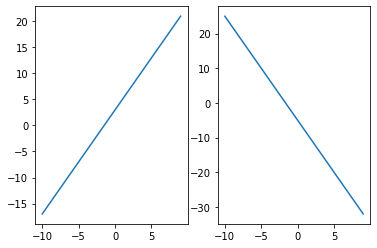

In [114]:
ax = pyplot.subplot(1,2,1)  # 1 by 2 grid, first grid
ax1 = pyplot.subplot(1,2,2) # 1 by 2 grid, second grid
ax.plot(x, y1)
ax1.plot(x,y)


As always, if you need more information about subploting, you can refer to the help documentation. Uncomment and run the cell below if necessary

In [115]:
help(pyplot.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are *nrows*, *ncols*, and *index* in order, the
        subplot will take the *index* position on a grid with *nrows*
        rows and *ncols* columns. *index* starts at 1 in the upper left
        corner and increases to the right.
    
        *pos* is a three digit integer, where the first digit is the
        number of rows, the second the number of columns, and the third
        the index of the subplot. i.e. fig.add_subplot(235) is the same as
       

## References


For more information on Matplotlib, see this link: <a href="http://matplotlib.org/">matplotlib</a>

For more information on color maps in Matplotlib, see <a href='http://matplotlib.org/examples/color/colormaps_reference.html'>color example code: colormaps_reference.py</a>

For more on Seaborn, see <a href="http://seaborn.pydata.org">Seaborn: Statistical Data Visualization</a>

For designing charts and visualizations, see this insightful link [Designing Charts and Graphs: How to Choose the Right Data Visualization Types](https://www.datapine.com/blog/how-to-choose-the-right-data-visualization-types/)

See the Matplotlib Pyplot gallery for more on different [plots](Matplotlib has great documentation on bar graphs [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar).

